# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m=1
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [2]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [3]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [4]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [5]:
print(N)

200.0

In [6]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [47]:
using Printf
include("./TMYangMillsTHREE.jl");

In [48]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.005
the time step is 0.002


# Initial data of m β Ψ and Ψ,x

In [49]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
A=0.1
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [50]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

201×3 Matrix{Float64}:
 0.0          0.0         0.0
 2.40471e-11  2.88109e-9  8.47904e-8
 1.18741e-10  9.60569e-9  2.275e-7
 3.31982e-10  1.97587e-8  4.56636e-7
 7.96096e-10  3.70637e-8  8.12599e-7
 1.78091e-9   6.76046e-8  1.35205e-6
 3.82476e-9   1.22061e-7  2.15371e-6
 7.98122e-9   2.19202e-7  3.32591e-6
 1.62753e-8   3.91755e-7  5.01645e-6
 3.25328e-8   6.96225e-7  7.42523e-6
 6.38623e-8   1.22914e-6  1.08204e-5
 1.23259e-7   2.15353e-6  1.55584e-5
 2.34106e-7   3.74162e-6  2.21096e-5
 ⋮                        
 0.0602695    0.196885    0.0047366
 0.0602727    0.196885    0.0047366
 0.0602758    0.196885    0.0047366
 0.0602789    0.196885    0.0047366
 0.0602819    0.196885    0.0047366
 0.060285     0.196885    0.0047366
 0.060288     0.196885    0.0047366
 0.0602909    0.196885    0.0047366
 0.0602939    0.196885    0.0047366
 0.0602968    0.196885    0.0047366
 0.0602996    0.196885    0.0047366
 0.0603025    0.196885    0.0047366

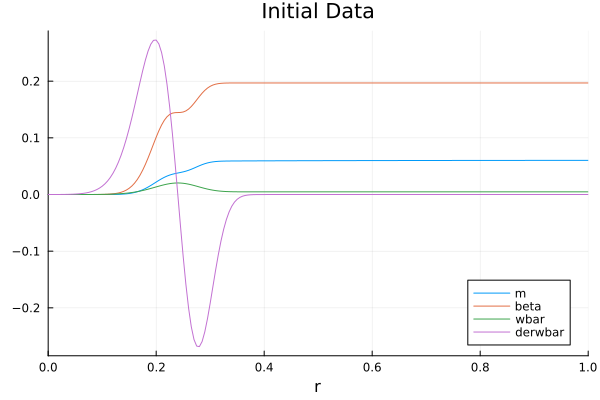

In [51]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [39]:
aux=exp.(2 .* state_array[:,2]) .* (1 .- 2 .* state_array[:,1] .* (1 .- initX) ./ initX) .* (1 .- initX) .^ 2  .*  state_array[:,4]
aux[4]=state_array[4,4]
a=Der([state_array aux],4,5,initX)

0.0014563694107758843

In [40]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [41]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi"]

print_muninn(files, 0, state_array[:,1:4],res,"w", initX)

In [42]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [43]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.525188767477016


In [44]:
using Base.Threads
Threads.nthreads()

4

In [45]:
dt=0.002/2^(m-1)

0.002

 ## Time evolution

fixed grid

In [46]:
finaltime=3.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

Supercritical evolution! At time 0.004, iteration = 2
t = 0.004iteration 2 monitor ratio = 9.31138093883922
